## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 7: Stock Market Prediction using Numerical and Textual Analysis


> In this task, we have to create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines 

### Steps:

* 1 - Importing the dataset
* 2 - Preparing Data
* 3 - Historical Data Preparation
* 4 - Visualizing the Stock data for NSCI prices
* 5 - Removing Unwanted Speical Characters
* 6 - Historial Stock Price of NSEI Analysis
* 7 - Error Calculation
* 8 - Texual Analysis
* 9 - Combining all Historical and Textual data
* 10 - Formation of Dataset for Model Training
* 11 - Normalize the Data
* 12 - Split the Dataset into Train & Test Data
     - RandomForestRegressor Model
     - DecisionTreeRegressor Model
     - AdaBoostRegressor Model
     - LGBMRegressor Model
     - XGBRegressor Model


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

import warnings as wg
wg.filterwarnings("ignore")

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm
from pandas_datareader.data import DataReader
from datetime import datetime

### 1 - Importing the dataset

In [7]:
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)
ndf.head(5)

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [8]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3650961,20220331,Garment industry jittery over'GST hike'
3650962,20220331,AAP MLAs interfering in work: Councillors
3650963,20220331,Schools organise vax camps for kids
3650964,20220331,Madhya Pradesh CM Shivraj Singh Chouhan promis...


In [159]:
hisdf = pd.read_csv("T7_data_NSEI.csv")
hisdf.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-25,10612.400391,10612.599609,10536.450195,10570.549805,10570.549805,189200.0
1,2018-04-26,10586.500000,10628.400391,10559.650391,10617.799805,10617.799805,335100.0
2,2018-04-27,10651.650391,10719.799805,10647.549805,10692.299805,10692.299805,0.0
3,2018-04-30,10705.750000,10759.000000,10704.599609,10739.349609,10739.349609,173800.0
4,2018-05-02,10783.849609,10784.650391,10689.799805,10718.049805,10718.049805,229700.0
...,...,...,...,...,...,...,...
1224,2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800.0
1225,2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300.0
1226,2023-04-12,17759.550781,17825.750000,17717.250000,17812.400391,17812.400391,232800.0
1227,2023-04-13,17807.300781,17842.150391,17729.650391,17828.000000,17828.000000,285800.0


### 2 - Preparing Data

In [39]:
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7717 non-null   datetime64[ns]
 1   News    7717 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 120.7+ KB


In [82]:
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates()
ndf.reset_index(inplace=True,drop=True)
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic demand for styl...
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...
7715,2022-03-30,I will not give in to trends Dossmode The tim...


In [12]:
ndf.isnull().sum()

Date    0
News    0
dtype: int64

In [13]:
len(ndf)

7717

### 3 - Historical Data Preparation

In [160]:
hisdf=hisdf[["Date","Open","High","Low","Close","Volume"]]
hisdf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2018-04-25,10612.400391,10612.599609,10536.450195,10570.549805,189200.0
1,2018-04-26,10586.500000,10628.400391,10559.650391,10617.799805,335100.0
2,2018-04-27,10651.650391,10719.799805,10647.549805,10692.299805,0.0
3,2018-04-30,10705.750000,10759.000000,10704.599609,10739.349609,173800.0
4,2018-05-02,10783.849609,10784.650391,10689.799805,10718.049805,229700.0
...,...,...,...,...,...,...
1224,2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,254800.0
1225,2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,304300.0
1226,2023-04-12,17759.550781,17825.750000,17717.250000,17812.400391,232800.0
1227,2023-04-13,17807.300781,17842.150391,17729.650391,17828.000000,285800.0


In [161]:
hisdf["Date"]= pd.to_datetime(hisdf["Date"])
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1234 non-null   datetime64[ns]
 1   Open    1231 non-null   float64       
 2   High    1231 non-null   float64       
 3   Low     1231 non-null   float64       
 4   Close   1231 non-null   float64       
 5   Volume  1231 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 58.0 KB


In [162]:
hisdf.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,1234,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,2020-10-24 17:10:24.311183104,13784.929334,13854.837082,13686.689992,13773.113771,4.203575e+05
min,2018-04-25 00:00:00,7735.149902,8036.950195,7511.100098,7610.250000,0.000000e+00
25%,2019-07-26 18:00:00,11143.199707,11205.424805,11061.324707,11131.824707,2.599000e+05
50%,2020-10-26 12:00:00,12269.250000,12289.900391,12213.250000,12262.750000,3.569000e+05
75%,2022-01-20 18:00:00,17066.700195,17154.549804,16917.950195,17032.424805,5.554000e+05
max,2023-04-24 00:00:00,18871.949219,18887.599609,18778.199219,18812.500000,1.811000e+06
std,NaN,2990.417878,2995.963729,2980.951150,2990.450096,2.204963e+05


In [163]:
hisdf.isnull().sum()

Date      0
Open      3
High      3
Low       3
Close     3
Volume    3
dtype: int64

In [164]:
hisdf.replace([np.inf, -np.inf], np.nan, inplace=True)
hisdf.dropna(inplace=True)

In [165]:
len(hisdf)

1231

### 4 - Visualizing the Stock data for NSCI prices

Text(0, 0.5, 'NSCI')

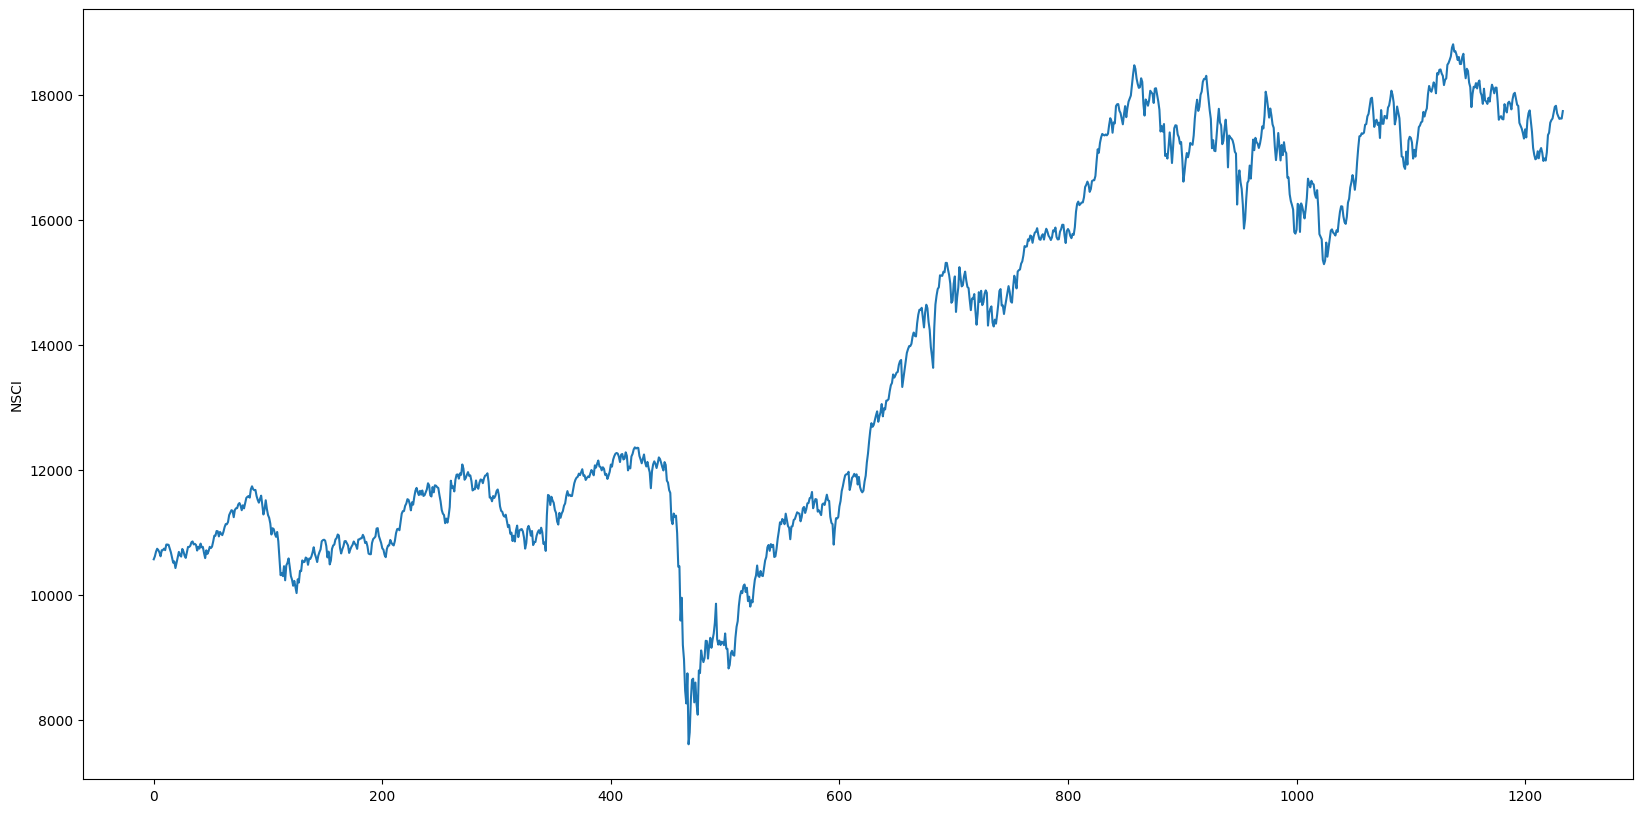

In [166]:
plt.figure(figsize=(20,10))
hisdf['Close'].plot()
plt.ylabel('NSCI')

### 5 - Removing Unwanted Speical Characters

In [167]:
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(10)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
5    Muslim body rules out talks on Ayodhya Bajrang...
6    Sangh Parivar  Babri panel up the ante Frontru...
7    Financier Bharat Shah held for alleged links w...
8    Fend for yourselves  Pande tells doctors Burea...
9    Sonia takes on the Hindutva brigade Congress h...
Name: News, dtype: object

### 6 - Historial Stock Price of NSEI Analysis
Ploting the historical average of changes in graph over the period of 5 years.

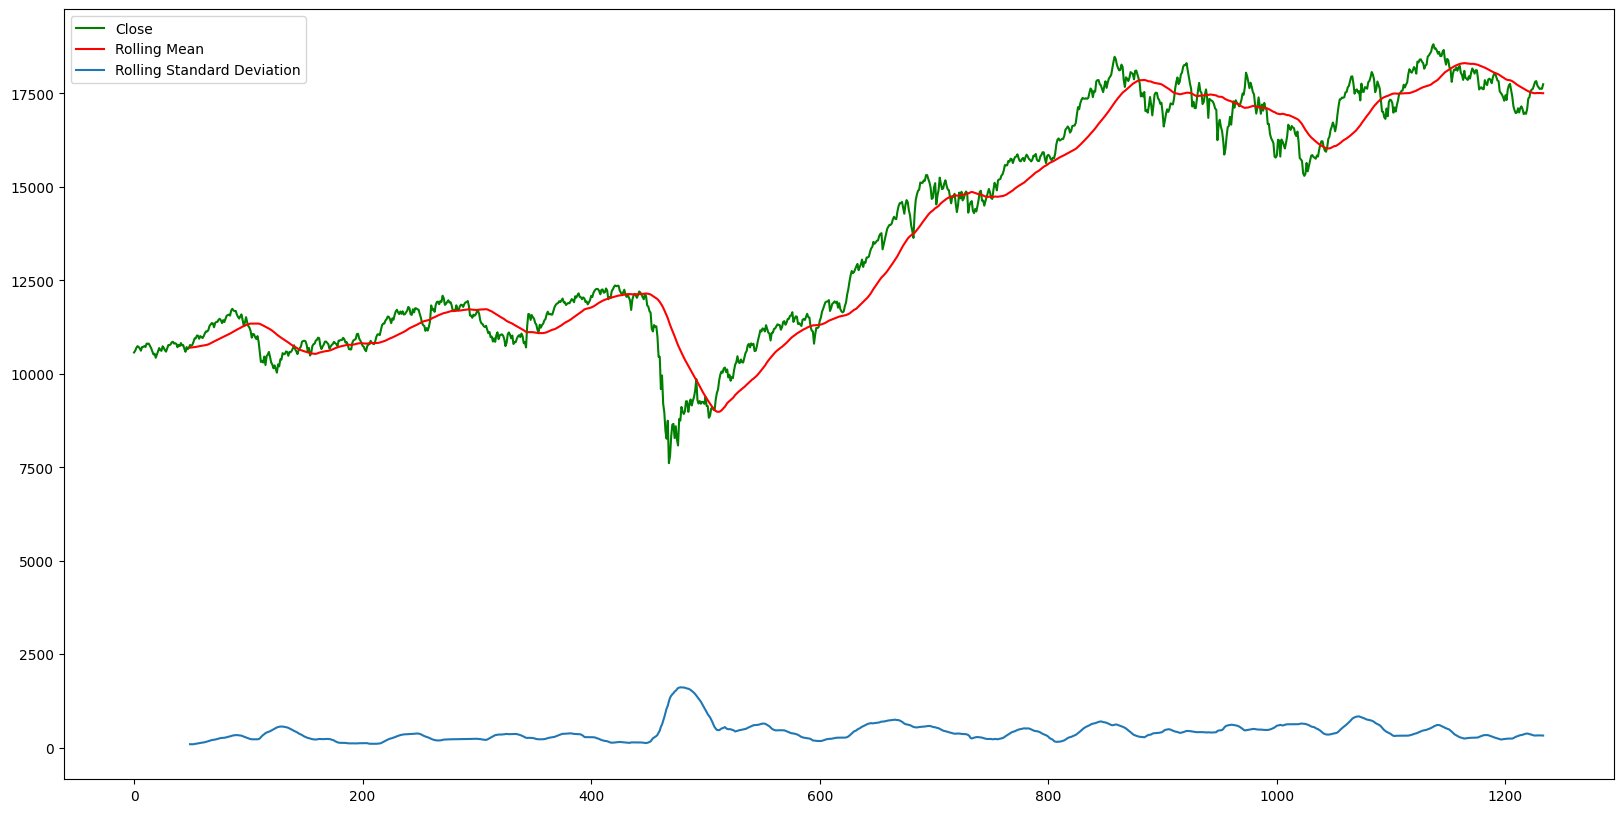

In [168]:
close = hisdf['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
hisdf['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

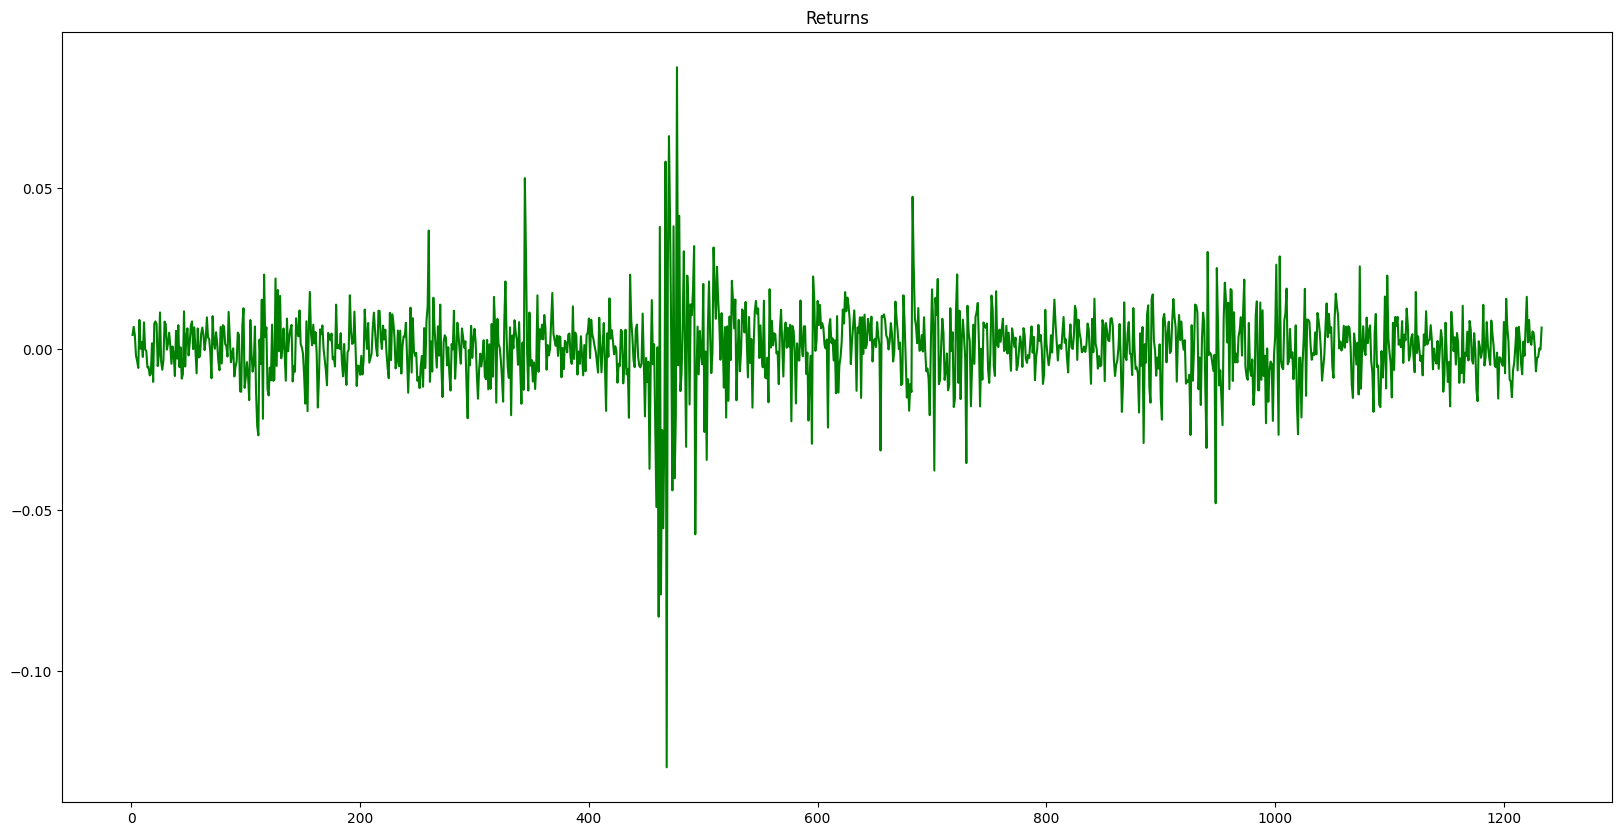

In [169]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [278]:
train = hisdf[:1225]
test = hisdf[1225:]

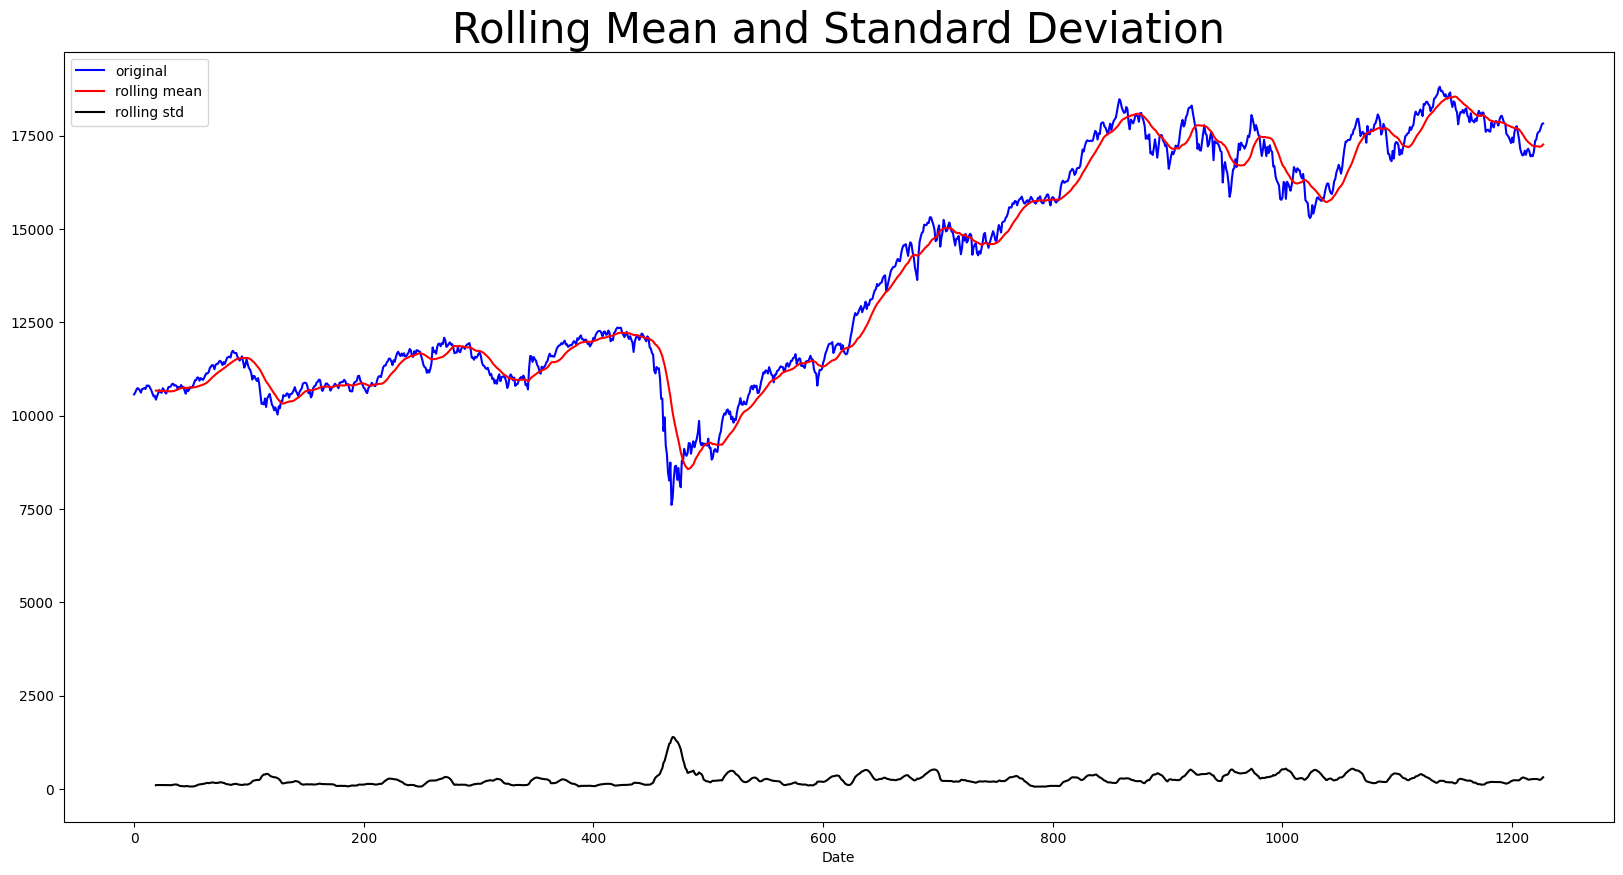

Results of dickey fuller test
ADF Test Statistic : -0.7270543505321548
p-value : 0.8396168561840243
#Lags Used : 6
Number of Observations Used : 1218
Weak evidence against null hypothesis, time series is non-stationary 


In [279]:
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

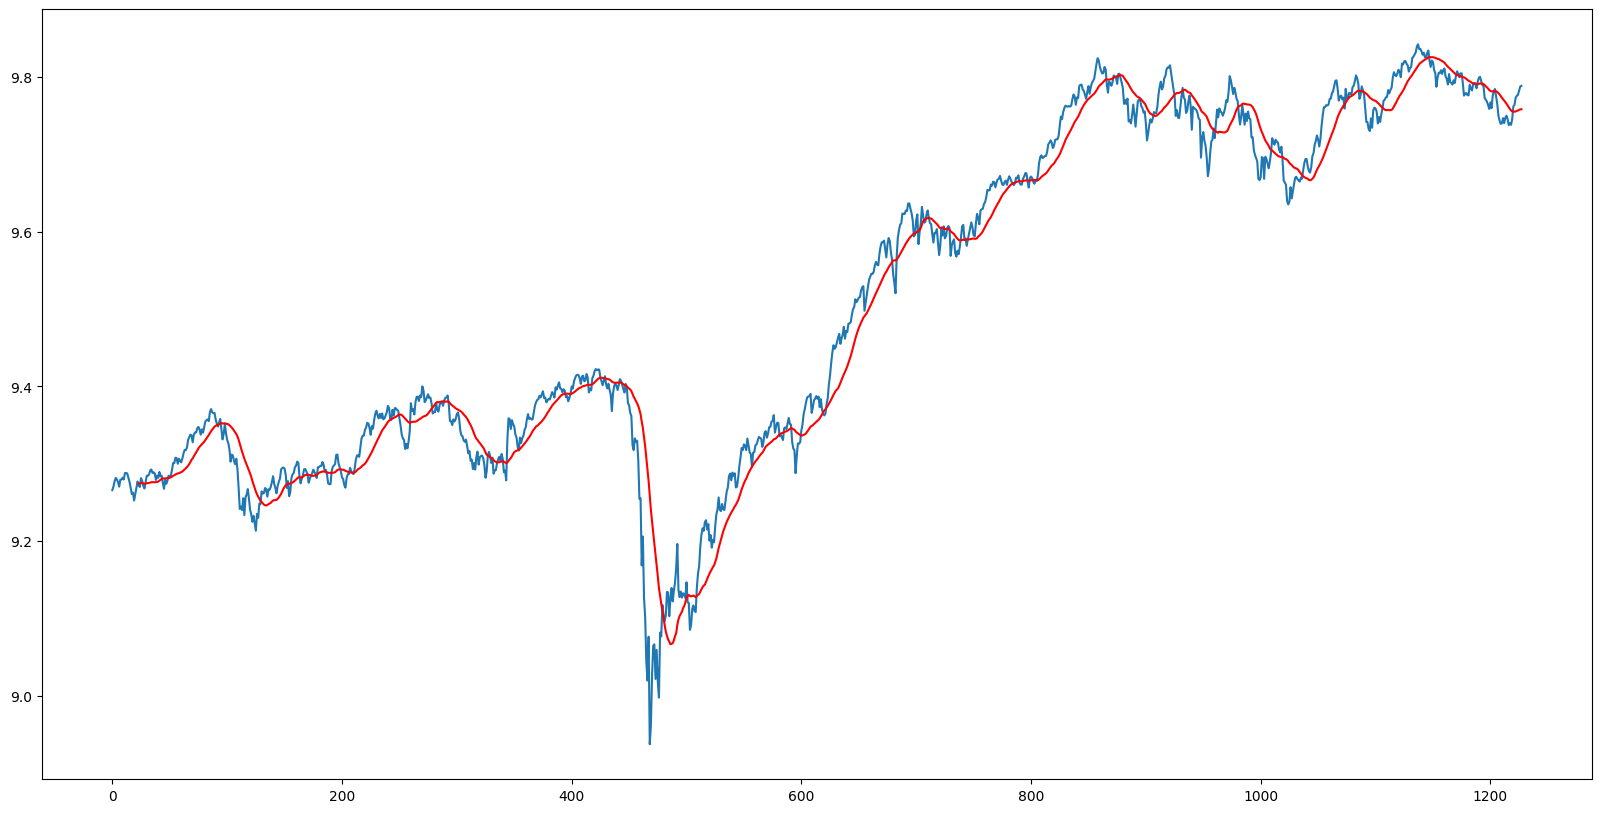

In [280]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean()
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

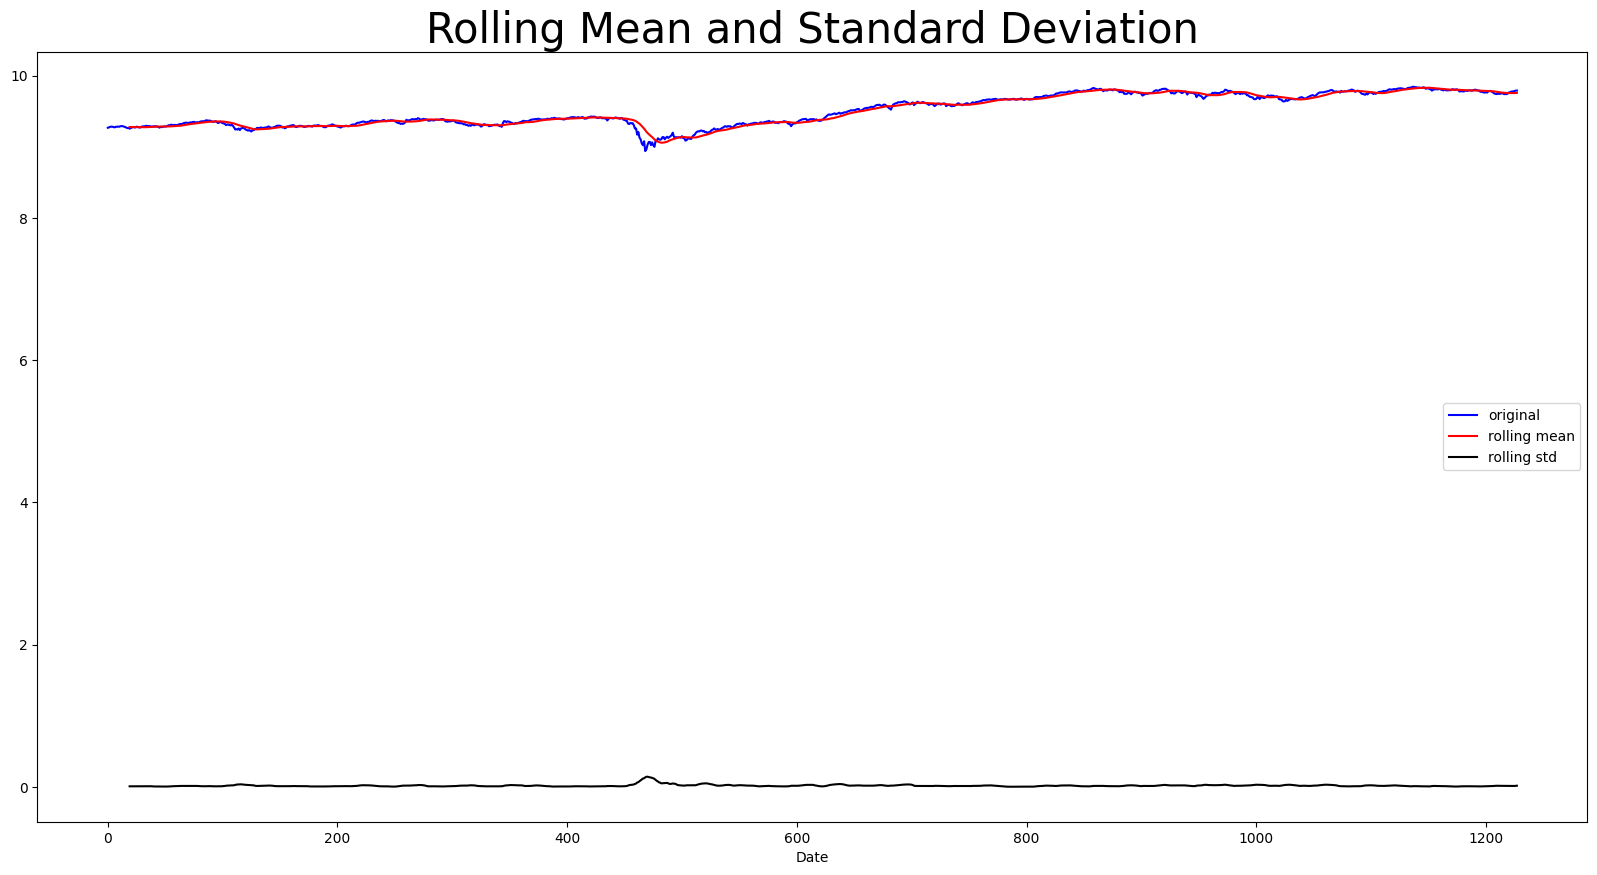

Results of dickey fuller test
ADF Test Statistic : -0.9252023847513515
p-value : 0.7795596642912259
#Lags Used : 11
Number of Observations Used : 1213
Weak evidence against null hypothesis, time series is non-stationary 


In [281]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

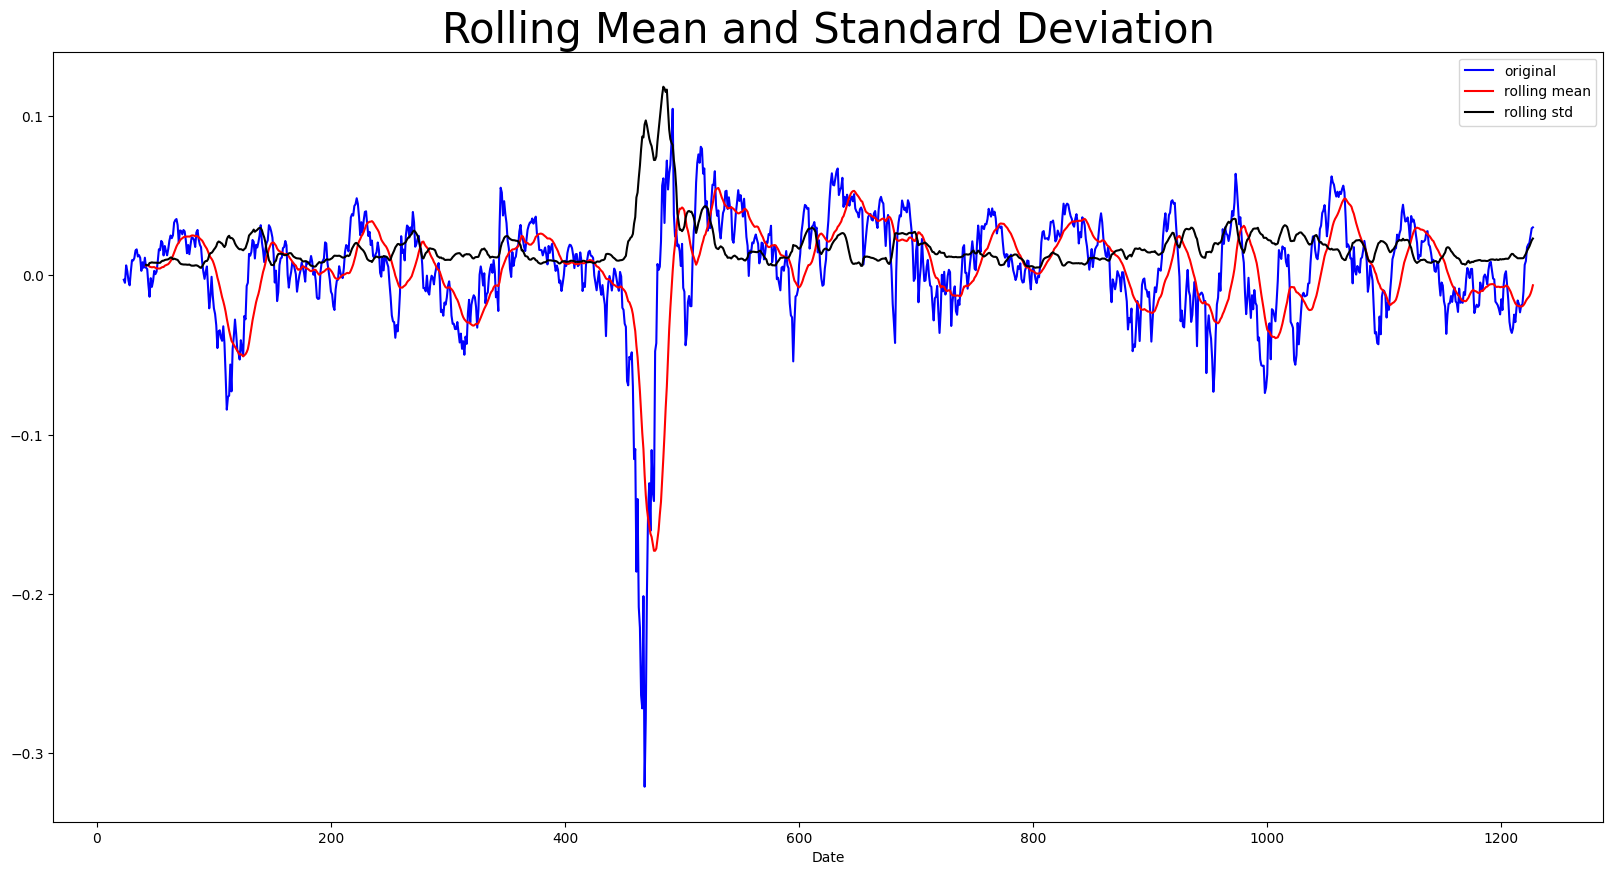

Results of dickey fuller test
ADF Test Statistic : -6.878279085262745
p-value : 1.4554840450617025e-09
#Lags Used : 12
Number of Observations Used : 1189
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [282]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [283]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7271.644, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7275.876, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7277.074, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7276.927, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7276.417, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7275.629, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7275.369, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7274.843, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7277.461, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-7276.085, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7275.773, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7277.315, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7276.176, Time=0.30 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.585 seconds


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'Actual Stock Price')

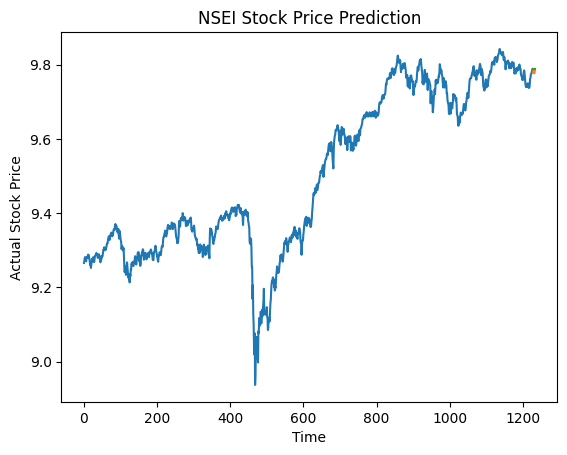

In [284]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('NSEI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [285]:
predictions

,Prediction
1228,9.788484
1229,9.788484
1230,9.788484
1231,9.788484
1232,9.788484
1233,9.788484


### 7 - Error Calculation

In [286]:
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.009640301902006609


### 8 - Texual Analysis

In [287]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [288]:
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,0.2924,0.000,0.880,0.120
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.6249,0.282,0.718,0.000
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.0000,0.000,1.000,0.000
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,-0.5859,0.242,0.758,0.000
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.3400,0.130,0.870,0.000
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.3400,0.213,0.594,0.193
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.1280,0.097,0.903,0.000
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,0.6597,0.000,0.759,0.241
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,0.0000,0.000,1.000,0.000


In [289]:
sia = SentimentIntensityAnalyzer()

In [290]:
##nltk.download(["names","stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt"])
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['News'].str[:500]]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['News'].str[:500]]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['News'].str[:500]]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['News'].str[:500]]
ndf

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,0.5080,0.087,0.812,0.101
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.9468,0.191,0.809,0.000
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,-0.3818,0.104,0.820,0.075
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.6369,0.123,0.711,0.166
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.0516,0.107,0.777,0.116
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.6557,0.076,0.924,0.000
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,0.9337,0.043,0.768,0.190
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,0.5656,0.071,0.827,0.102


### 9 - Combining all Historical and Textual data

In [291]:
df_merge = pd.merge(hisdf, ndf, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2018-04-25,10612.400391,10612.599609,10536.450195,10570.549805,189200.0,Prima facie conspiracy case exists against Mil...,0.360471,0.046077,0.6335,0.043,0.838,0.120
1,2018-04-26,10586.500000,10628.400391,10559.650391,10617.799805,335100.0,Bharadwaj brothers sent to judicial custody ti...,0.388508,0.055227,0.6597,0.074,0.788,0.138
2,2018-04-27,10651.650391,10719.799805,10647.549805,10692.299805,0.0,Hippo calf's death could be natural viteee ...,0.419595,0.071329,0.9682,0.042,0.668,0.290
3,2018-04-30,10705.750000,10759.000000,10704.599609,10739.349609,173800.0,Pick the right red lipstick Bollywood celebrit...,0.402834,0.076393,0.9790,0.000,0.726,0.274
4,2018-05-02,10783.849609,10784.650391,10689.799805,10718.049805,229700.0,Bollywood actors who shared screen space with ...,0.399322,0.062950,0.7096,0.025,0.882,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2022-03-25,17289.000000,17294.900391,17076.550781,17153.000000,237100.0,Speeding up shortcuts and tackling unruly cus...,0.373221,-0.003922,0.8979,0.028,0.793,0.179
965,2022-03-28,17181.849609,17235.099609,17003.900391,17222.000000,253200.0,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.6557,0.076,0.924,0.000
966,2022-03-29,17297.199219,17343.650391,17235.699219,17325.300781,235100.0,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,0.9337,0.043,0.768,0.190
967,2022-03-30,17468.150391,17522.500000,17387.199219,17498.250000,505000.0,I will not give in to trends Dossmode The tim...,0.344136,0.039954,0.5656,0.071,0.827,0.102


### 10 - Formation of Dataset for Model Training

In [292]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,10570.549805,0.360471,0.046077,0.6335,0.043,0.838,0.120
1,10617.799805,0.388508,0.055227,0.6597,0.074,0.788,0.138
2,10692.299805,0.419595,0.071329,0.9682,0.042,0.668,0.290
3,10739.349609,0.402834,0.076393,0.9790,0.000,0.726,0.274
4,10718.049805,0.399322,0.062950,0.7096,0.025,0.882,0.093
...,...,...,...,...,...,...,...
964,17153.000000,0.373221,-0.003922,0.8979,0.028,0.793,0.179
965,17222.000000,0.383007,0.058513,-0.6557,0.076,0.924,0.000
966,17325.300781,0.403627,0.092144,0.9337,0.043,0.768,0.190
967,17498.250000,0.344136,0.039954,0.5656,0.071,0.827,0.102


### 11 - Normalize the Data

In [293]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.272417,0.266845,0.381759,0.817905,0.140523,0.656051,0.254777
1,0.276765,0.474077,0.451223,0.831202,0.241830,0.549894,0.292994
2,0.283621,0.703856,0.573466,0.987769,0.137255,0.295117,0.615711
3,0.287950,0.579967,0.611910,0.993250,0.000000,0.418259,0.581741
4,0.285990,0.554006,0.509854,0.856527,0.081699,0.749469,0.197452


In [294]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.266845,0.381759,0.817905,0.140523,0.656051,0.254777
1,0.474077,0.451223,0.831202,0.241830,0.549894,0.292994
2,0.703856,0.573466,0.987769,0.137255,0.295117,0.615711
3,0.579967,0.611910,0.993250,0.000000,0.418259,0.581741
4,0.554006,0.509854,0.856527,0.081699,0.749469,0.197452
...,...,...,...,...,...,...
964,0.361082,0.002176,0.952091,0.091503,0.560510,0.380042
965,0.433419,0.476166,0.163622,0.248366,0.838641,0.000000
966,0.585831,0.731485,0.970260,0.140523,0.507431,0.403397
967,0.146103,0.335271,0.783445,0.232026,0.632696,0.216561


In [295]:
Y=df['Close']
Y

0      0.272417
1      0.276765
2      0.283621
3      0.287950
4      0.285990
         ...   
964    0.878156
965    0.884506
966    0.894012
967    0.909927
968    0.906845
Name: Close, Length: 969, dtype: float64

### 12 - Split the Dataset into Train & Test Data

In [296]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(775, 6)

In [297]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
196,0.715724,0.382813,0.967672,0.133987,0.494692,0.418259
452,0.553406,0.404935,0.981983,0.094771,0.467091,0.471338
798,0.427617,0.440389,0.942651,0.153595,0.549894,0.352442
62,0.449386,0.493724,0.877335,0.238562,0.545648,0.297240
79,0.761074,0.797967,0.766596,0.264706,0.530786,0.295117
656,0.632738,0.574043,0.646620,0.166667,0.707006,0.184713
193,0.513247,0.407091,0.938439,0.153595,0.598726,0.301486
181,0.363703,0.286853,0.964170,0.052288,0.585987,0.380042
710,0.439429,0.429565,0.915652,0.202614,0.503185,0.363057
698,0.260015,0.498192,0.897635,0.104575,0.649682,0.282378


### RandomForestRegressor Model

In [298]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [299]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.43218415 0.64995562 0.50751109 0.46183823 0.39610522 0.50389177
 0.75292648 0.64450026 0.52951048 0.48835256]
932    0.883733
279    0.375571
14     0.288111
681    0.647624
458    0.262096
765    0.748136
685    0.690686
833    0.911878
379    0.393331
558    0.330355
Name: Close, dtype: float64
Mean Squared error:  0.056239118815818535


### DecisionTreeRegressor Model

In [300]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [301]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[0.12618251 0.87421317 0.74648927 0.73292957 0.74872542 0.01755805
 0.93373848 0.39793221 0.87345847 0.30170331]
932    0.883733
279    0.375571
14     0.288111
681    0.647624
458    0.262096
765    0.748136
685    0.690686
833    0.911878
379    0.393331
558    0.330355
Name: Close, dtype: float64
Mean Squared error:  0.11699379427903962


### AdaBoostRegressor Model

In [302]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [303]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.053406490287880255


### LGBMRegressor Model

In [308]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor()

In [311]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.05622620241906598


### XGBRegressor Model

In [306]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [307]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.06433218726855436


### Conclusion

* RANDOM FOREST REGRESSOR MODEL  : 0.056239118815818535
    
* DECISION TREE REGRESSOR MODEL  : 0.11699379427903962
    
* ADABOOST REGRESSOR  MODEL      : 0.053406490287880255
    
* LGBM MODEL                     : 0.05622620241906598

* XGBOOST MODEL                  : 0.06433218726855436

From here we can see that LDBM shows a better performance than the others.


## Thank you!